<a href="https://colab.research.google.com/github/veronica1013/Datascience_core_module2_week2_IP/blob/main/Moringa_Data_Science_Core_Module2_W2_Independent_Project_2021_10_Veronica_Isiaho_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factors Affecting Housing Pricing

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist, working for Hass Consulting Company, a real estate leader with over 25 years of experience, my main aim is to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success
A model that will accurately predict the sale of house prices 

#### Significance level
The significance level is set at alpha = 0.05

### c) Understanding the context 


Details of the columns is as listed below:
1. Id 
2. price  - Price of the house
3. bedrooms - Number of Bedrooms
4. bathrooms - Number of Bathrooms
5. sqft_living - Square feet area of living area
6. sqft_lot  - Square feet area of parking Layout
7. floors - Number of Floors
8. waterfront - Whether waterfront is there or not
9. view - Number of Views
10. grade - Grades
11. sqft_above
12. sqft_basement - Square feet area off basement
13. yr_built - Year the house is built
14. yr_renovated - Year the house is renovated
15. zipcode - zipcode os the house
16. lat : Latitude of the house
17. lon : Longitude of the house
18. sqft_living15
19. sqft_lot15

### d) Recording the Experimental Design
The experimental design will be as listed below:
1. Loading the data
2. Understanding the data
3. Data Cleaning
4. Perform univariate, bivariate and multivariate analysis
5. Perform regression analysis (Incorporate categorical independent variables into the models)
*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression
6. Check for Multicollinearity
7. Provide a recommendation based on the analysis
8. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
9. Challenge the solution by providing insights on how to make improvements in model 

### e) Data Relevance

The data that was used for prediction was obtained from the information on real estate properties that was collected over the past few months.

### 1.1 Importing the libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2. Loading the Data

The dataset and glossary to use for this project can be found here [link](http://bit.ly/IndependentProjectWeek7Dataset).

In [2]:
# Loading the data 
url = "http://bit.ly/IndependentProjectWeek7Dataset"
data_df= pd.read_csv(url)


## 3. Checking the Data

In [3]:
# Preview first rows
data_df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [4]:
# Preview last rows
data_df.tail(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# Check the shape
data_df.shape

(21613, 20)

In [6]:
# Ckeck column names
data_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# Check the data types
data_df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
# Check if there are any missing values
data_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Check duplicates if any in the dataset
data_df.duplicated().sum()

3

In [10]:
# Confirm the 3 duplicates
duplicate = data_df[data_df.duplicated()]
duplicate

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


It is evident that the data is not similar. Thus decided to keep them.

In [11]:
# Check for duplicates using the id column
data_df['id'].duplicated().sum()

177

In [12]:
# Check the index of the duplicates
duplicate_id = data_df['id'][data_df['id'].duplicated()]
duplicate_id

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20181    7853400250
20613    2724049222
20670    8564860270
20780    6300000226
21581    7853420110
Name: id, Length: 177, dtype: int64

In [13]:
# Check for duplicates by column id
duplicated_id = data_df[data_df['id'].duplicated()]
duplicated_id

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,645000.0,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,220000.0,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [14]:
# Check for duplicates by id and price column
for i in data_df['id']:
  if i == 6021501535:
    print(i)
  

df_duplicates = data_df[data_df.duplicated(subset=['id', 'price'], keep=False)]
df_duplicates

6021501535
6021501535


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3950,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14982,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20053,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


Checking for duplicates by price and id column returns six data points. I will check for exact details of the 177 duplicates by using keep=False for ease of comparison

In [15]:
# Confirm details of the duplicates
df1_duplicates = data_df[data_df.duplicated(subset=['id'], keep=False)]
df1_duplicates

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


It's evident that the data points with the duplicate values are of the same house gauginh from the location, sizes, year buit etc but the difference is in their prices. With the price variations, it is difficult to make a decision on which price to keep  so I will drop all the duplicate houses with different prices during data cleaning.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation
Performed a validation with the Hass Consult [Website](https://hassconsult.co.ke/real-estate/hass-index/14-the-hass-sales-index?typ=2&layout=3). More information is found on this [link](https://hassconsult.co.ke/real-estate/images/HassPropertyIndexQ12021.pdf).

## 5. Data Cleaning

### 5.1 Cleaning the Dataset

In [16]:
# Considering that we will use rank, country full and rank date columns, we will drop the rest 
# as they wont be used.
# The Rank column from the Rankings dataset will be used to merge onto the results dataset
#column_names = ['country_abrv', 'total_points',
       #'previous_points', 'rank_change', 'cur_year_avg',
       #'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       #'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       #'three_year_ago_weighted', 'confederation']

#ranking_df = ranking_data.drop(columns=column_names)
#ranking_df.head(2)

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [18]:
# Change the data type for year built and year renovated column from int64 to datetime
data_df["yr_built"] = pd.to_datetime(data_df["yr_built"], format='%Y')
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [19]:
# Can't change the year renovated data type to datetime because of the zero value as years
# Change the datatype to string first
data_df["yr_renovated"] = data_df["yr_renovated"].astype(str)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   21613 non-null  object        
 15  zipcode        2161

In [20]:
# Change the string to four zeros
data_df['yr_renovated']=['000'+x if x=='0' else x for x in data_df['yr_renovated'] ]
data_df['yr_renovated']

0        0000
1        1991
2        0000
3        0000
4        0000
         ... 
21608    0000
21609    0000
21610    0000
21611    0000
21612    0000
Name: yr_renovated, Length: 21613, dtype: object

In [21]:
# check the number of houses with no year of renovation
# 20,699 houses didn't have year of renovation
# We will keep them and try make a comparison and see if it has any impact on the sales prices
data_df['yr_renovated'].value_counts()


0000    20699
2014       91
2013       37
2003       36
2000       35
        ...  
1951        1
1959        1
1934        1
1948        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
# change the zero years to nan to enable conversion of year renovated column to datetime
data_df['yr_renovated'] = data_df['yr_renovated'].replace('0000',np.nan)
data_df['yr_renovated']

0         NaN
1        1991
2         NaN
3         NaN
4         NaN
         ... 
21608     NaN
21609     NaN
21610     NaN
21611     NaN
21612     NaN
Name: yr_renovated, Length: 21613, dtype: object

In [23]:
# change the year renovated column from object to datetime
data_df["yr_renovated"] = pd.to_datetime(data_df["yr_renovated"], format='%Y')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   914 non-null    datetime64[ns]
 15  zipcode        2161

In [24]:
data_df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955-01-01,NaT,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951-01-01,1991-01-01,98125,47.7210,-122.319,1690,7639


In [25]:
# Choosing a Sample size
data = data_df.sample(n=14700, replace="False")
data.shape

(14700, 20)

In [26]:
# Create a new column to capture the year built for easy sorting of the data by year column
df = data.copy(deep=True)
df["year_built"] = pd.DatetimeIndex(df["yr_built"]).year

# Confirm the changes
df.tail(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
3970,4438000165,122000.0,2,1.00,730,6728,1.0,0,0,3,6,730,0,1953-01-01,NaT,98148,47.4275,-122.324,1170,7034,1953
5819,7200001259,570000.0,3,1.75,2390,9000,1.0,0,0,3,8,1500,890,1975-01-01,NaT,98052,47.6809,-122.113,2040,9000,1975
16286,7527000020,792000.0,3,2.50,2250,19270,2.0,0,0,3,8,2250,0,1999-01-01,NaT,98074,47.6569,-122.088,2940,19541,1999


In [27]:
# Create a new column to capture the year renovated for easy sorting of the data by year column
df['year_renovated'] = pd.DatetimeIndex(df["yr_renovated"]).year

# Confirm the changes
df.head(3)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
16074,7457000005,1220000.0,4,2.00,3090,8125,2.5,0,0,5,8,3090,0,1918-01-01,NaT,98117,47.6851,-122.395,1560,6250,1918,NaN
10889,1072010510,435000.0,4,2.25,2210,14073,1.0,0,0,3,8,1630,580,1978-01-01,NaT,98059,47.4774,-122.142,2340,11340,1978,NaN
14274,5318101075,960000.0,3,1.75,2460,4800,1.0,0,0,4,7,1230,1230,1938-01-01,NaT,98112,47.6343,-122.282,2860,4800,1938,NaN


In [28]:
# Replace the missing values in year column with zero
df['year_renovated'] = df['year_renovated'].fillna(0)
df['year_renovated']

16074    0.0
10889    0.0
14274    0.0
13774    0.0
21418    0.0
        ... 
4106     0.0
18625    0.0
3970     0.0
5819     0.0
16286    0.0
Name: year_renovated, Length: 14700, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14700 entries, 16074 to 16286
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              14700 non-null  int64         
 1   price           14700 non-null  float64       
 2   bedrooms        14700 non-null  int64         
 3   bathrooms       14700 non-null  float64       
 4   sqft_living     14700 non-null  int64         
 5   sqft_lot        14700 non-null  int64         
 6   floors          14700 non-null  float64       
 7   waterfront      14700 non-null  int64         
 8   view            14700 non-null  int64         
 9   condition       14700 non-null  int64         
 10  grade           14700 non-null  int64         
 11  sqft_above      14700 non-null  int64         
 12  sqft_basement   14700 non-null  int64         
 13  yr_built        14700 non-null  datetime64[ns]
 14  yr_renovated    632 non-null    datetime64[ns]
 15

In [30]:
# Drop unneccesary columns 
new_df = df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
16074,7457000005,1220000.0,4,2.00,3090,8125,2.5,0,0,5,8,3090,0,98117,47.6851,-122.395,1560,6250,1918,0.0
10889,1072010510,435000.0,4,2.25,2210,14073,1.0,0,0,3,8,1630,580,98059,47.4774,-122.142,2340,11340,1978,0.0


In [31]:
# drop all the duplicate values
df.drop_duplicates(subset ="id", keep = False, inplace = True)
df.shape

(7415, 20)

In [32]:
#from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
#%matplotlib inline

#lat = df['lat'].values
#lat1 = np.array(list(map(np.float, lat)))

#lon = df['long'].values
#lon1 = np.array(list(map(np.float, lon)))

#plt.figure(figsize=(8, 8))
#m = Basemap(projection='ortho', resolution=None, lat_0=lat1, lon_0=lon1)
#m.bluemarble(scale=0.5);

In [33]:
#geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]

In [34]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

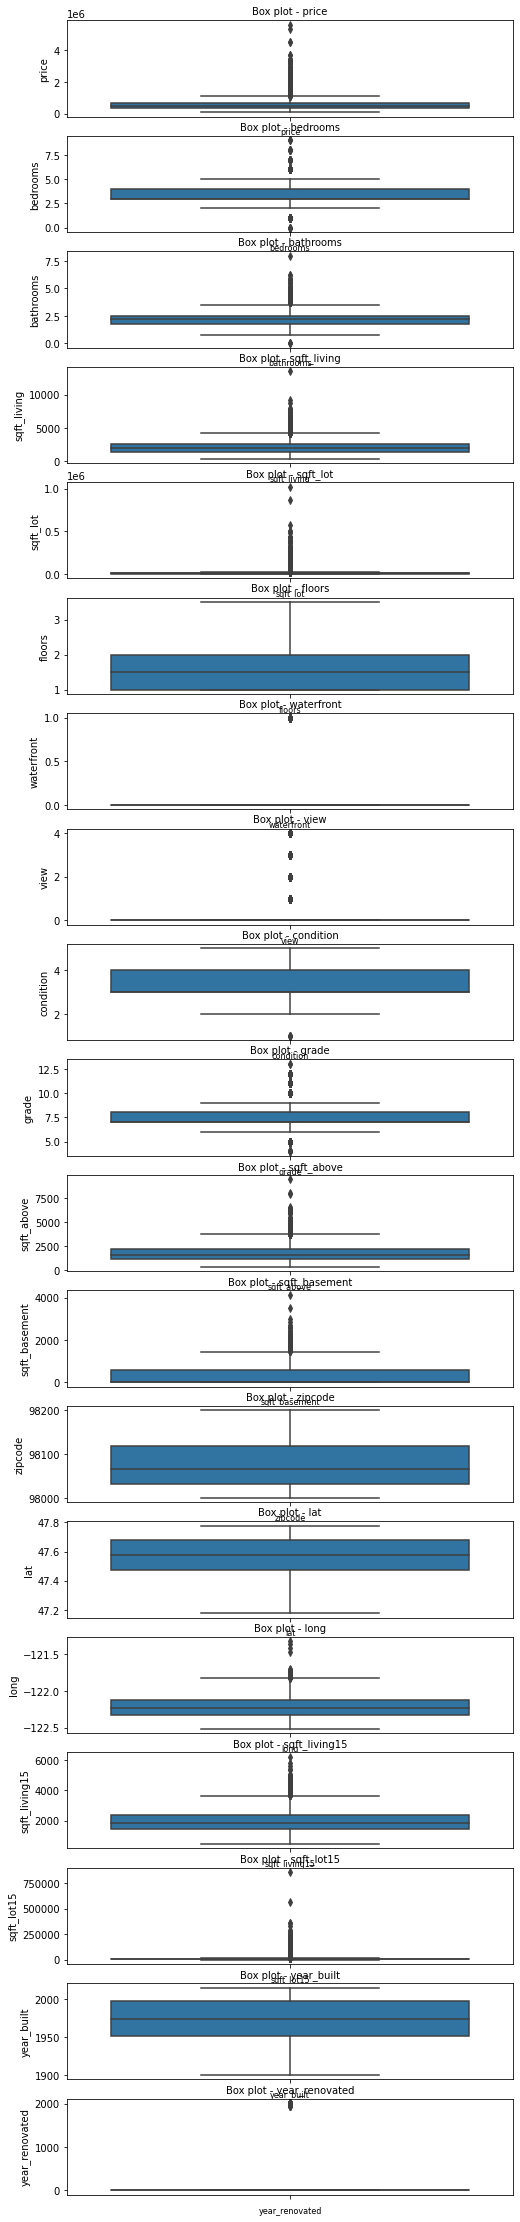

In [35]:
# Plotting columns with numerical values only to check for outliers
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
             'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'year_built', 'year_renovated']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# The outliers on the year renovated column is because most years are captured as
# zero so we will create a new column to show those renovated as 1 and those not renovated as 0


In [36]:
# checking the anomalies
Quantile_1 = df.quantile(.25)
Quantile_3 = df.quantile(.75)
IQR_values = Quantile_3 - Quantile_1

anomalies = ((df < Quantile_1 - 1.5* IQR_values) | (df > Quantile_3 + 1.5 * IQR_values)).sum()
anomalies

id                  0
price             387
bedrooms          190
bathrooms         166
sqft_living       191
sqft_lot          797
floors              0
waterfront         48
view              715
condition           6
grade             615
sqft_above        213
sqft_basement     152
zipcode             0
lat                 0
long               83
sqft_living15     176
sqft_lot15        728
year_built          0
year_renovated    336
dtype: int64

Initially we had seen that the year renovated column had 914 entries with years indicated while almost 20,000 entries didn't have any year of renovation indicated. Having 906 entries on year renovated as an anomaly is because majority of the data in that column had zero as year of renovation. We will therefore not drop these anomalies as they are not anomalies per se.

In [37]:
# Checking the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

data = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
             'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'year_built', 'year_renovated']]

# Test for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')


Statistics=0.256, p=0.000
Sample does not look Guassian.


## 6. Exploratory Analysis

In [38]:
# Change the bathroom and floors datatype from float to integer 
# Because the number of bathrooms and floors need to be whole numbers
# But first, round off the float values
# Then convert float to integer
df['bathrooms'] = df['bathrooms'].round(0)
df['floors'] = df['floors'].round(0)

In [39]:
# Convert float values of bathrooms and floors to integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [40]:
# check the unique values in columns
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [41]:
# check the unique values on the view column
# The most viewed houses had 4 views and there are those houses that didn't have a view
df['view'].unique()

array([0, 3, 4, 2, 1])

In [42]:
# Houses with waterfront had the value 1 and those with no water front had
# the value 0
df['waterfront'].unique()

array([0, 1])

In [43]:
# There were houses with most number of bathrooms: 7
df['bathrooms'].unique()

array([2, 3, 1, 4, 5, 6, 8, 0])

In [44]:
# The number of floors ranged from 1, 2 to 3
df['floors'].unique()

array([2, 1, 3, 4])

In [45]:
# There was a house with 33 number of bedrooms. But because of the selection of sample size,
# it is not part of the sample.
# Therfore remaining with houses with the highest number of bedrooms as 11
df['bedrooms'].unique()

array([4, 3, 5, 2, 6, 7, 1, 8, 0, 9])

In [46]:
# Previewing the outliers on the bedrooms column to see if the houses with 11 and 8 number
# number of bedrooms is viable
gkk = df.groupby(['bedrooms'])
gkk.last()
# From previewing the bedromms column, it's confirmed that that particular house


,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
bedrooms,,,,,,,,,,,,,,,,,,,
0,9543000205,139950.0,0,844,4269,1,0,0,4,7,844,0,98001,47.2781,-122.250,1380,9600,1913,0.0
1,7550800916,395000.0,1,730,3000,1,0,0,3,7,730,0,98107,47.6741,-122.396,1520,5000,1911,0.0
2,345700040,315000.0,1,1010,7338,2,0,0,4,7,1010,0,98056,47.5123,-122.190,1220,7719,1981,0.0
3,7527000020,792000.0,2,2250,19270,2,0,0,3,8,2250,0,98074,47.6569,-122.088,2940,19541,1999,0.0
4,2923501130,588000.0,2,2580,7344,2,0,0,3,8,2580,0,98027,47.5647,-122.090,2390,7507,1977,0.0
5,1853080840,889950.0,4,3700,7055,2,0,0,3,9,3700,0,98074,47.5929,-122.057,3170,6527,2014,0.0
6,1180002470,354000.0,4,3020,4500,2,0,0,3,7,3020,0,98178,47.4980,-122.225,900,6000,1941,1992.0
7,263000324,550000.0,4,3440,8100,2,0,0,3,7,3440,0,98103,47.6981,-122.349,1420,1560,1970,0.0
8,2769600590,900000.0,4,4020,7500,1,0,0,3,8,2010,2010,98107,47.6732,-122.363,1560,3737,1968,0.0


### 6.1 Univariate Analysis

In [47]:
# Ploting the univariate summaries
df_1 = df.copy(deep=True)
col = ['id', 'waterfront', 'zipcode', 'lat', 'long', 'sqft_living15',
       'year_built', 'year_renovated']

df_drop = df_1.drop(columns=col, inplace=True)
df_1.columns
df_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_lot15
count,7.415000e+03,7415.000000,7415.000000,7415.000000,7.415000e+03,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000,7415.000000
mean,5.389472e+05,3.376399,2.062036,2078.310317,1.475928e+04,1.539177,0.231827,3.416588,7.653810,1782.907485,295.402832,12626.121510
std,3.552037e+05,0.912438,0.746131,913.506154,3.721301e+04,0.558473,0.766201,0.647270,1.150194,818.693044,444.581635,27168.258266
min,8.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,4.000000,370.000000,0.000000,651.000000
25%,3.250000e+05,3.000000,2.000000,1430.000000,5.007500e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,5067.000000
50%,4.500000e+05,3.000000,2.000000,1920.000000,7.616000e+03,2.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,7598.000000
75%,6.412500e+05,4.000000,2.000000,2540.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,580.000000,10037.500000
max,5.570000e+06,9.000000,8.000000,13540.000000,1.024068e+06,4.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,858132.000000


In [48]:
# Sort Values By Views
most_viewed= df.sort_values(by = 'view', ascending = False)
most_viewed.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
13155,2521059042,456000.0,5,3,2720,193406,1,0,4,4,7,1700,1020,98092,47.2838,-122.121,2820,248292,1968,0.0
13966,6102400166,649000.0,3,2,1810,17006,2,1,4,3,8,1810,0,98166,47.4663,-122.369,2180,24911,1913,1987.0
6508,4217402115,3650000.0,6,5,5480,19401,2,1,4,5,11,3910,1570,98105,47.6515,-122.277,3510,15810,1936,0.0
9252,7352200025,1190000.0,2,2,2080,8112,1,1,4,4,8,1040,1040,98125,47.7134,-122.277,2030,8408,1939,1984.0
14083,3625059043,3300000.0,5,5,6200,13873,2,1,4,4,11,4440,1760,98008,47.6050,-122.112,2940,13525,1989,0.0


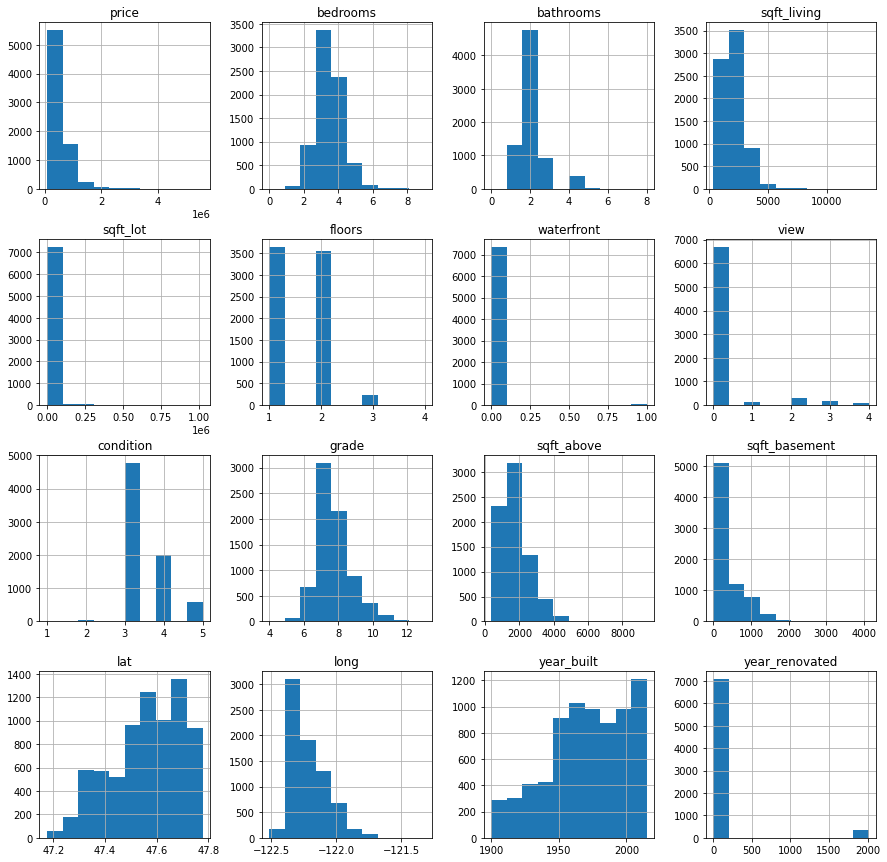

In [49]:
# Plot histogram to show the value count per parameters
most_viewed.drop(columns=['id', 'zipcode', 'sqft_living15', 'sqft_lot15'], inplace=True)

most_viewed.hist(figsize = (15, 15));


In [50]:
# Check the Skewness
for i, col_val in enumerate(df_1.columns):
  print(f"The skewness of {col_val} is: {df_1[col_val].skew()}")

The skewness of price is: 3.6284006861976033
The skewness of bedrooms is: 0.5228055213813191
The skewness of bathrooms is: 1.031593927125477
The skewness of sqft_living is: 1.5721143907915924
The skewness of sqft_lot is: 10.069921038493607
The skewness of floors is: 0.41005591109648554
The skewness of view is: 3.423996178008025
The skewness of condition is: 1.0462536474422623
The skewness of grade is: 0.7762853936633982
The skewness of sqft_above is: 1.4660850853045986
The skewness of sqft_basement is: 1.59037998924889
The skewness of sqft_lot15 is: 10.253366850376528


In [51]:
# Check the Kurtosis
for i, col_val in enumerate(df_1.columns):
  print(f"The kurtosis of {col_val} is: {df_1[col_val].kurt()}")

The kurtosis of price is: 25.31878530526582
The kurtosis of bedrooms is: 1.7007802971941235
The kurtosis of bathrooms is: 2.4956195371743055
The kurtosis of sqft_living is: 6.730048404419958
The kurtosis of sqft_lot is: 160.06889589738807
The kurtosis of floors is: -0.7390676690583673
The kurtosis of view is: 11.038206129814942
The kurtosis of condition is: 0.41265697902867693
The kurtosis of grade is: 1.157348226929022
The kurtosis of sqft_above is: 3.7557260563173482
The kurtosis of sqft_basement is: 2.8413456738824916
The kurtosis of sqft_lot15 is: 185.79073139347813


### 6.2 Bivariate Analysis

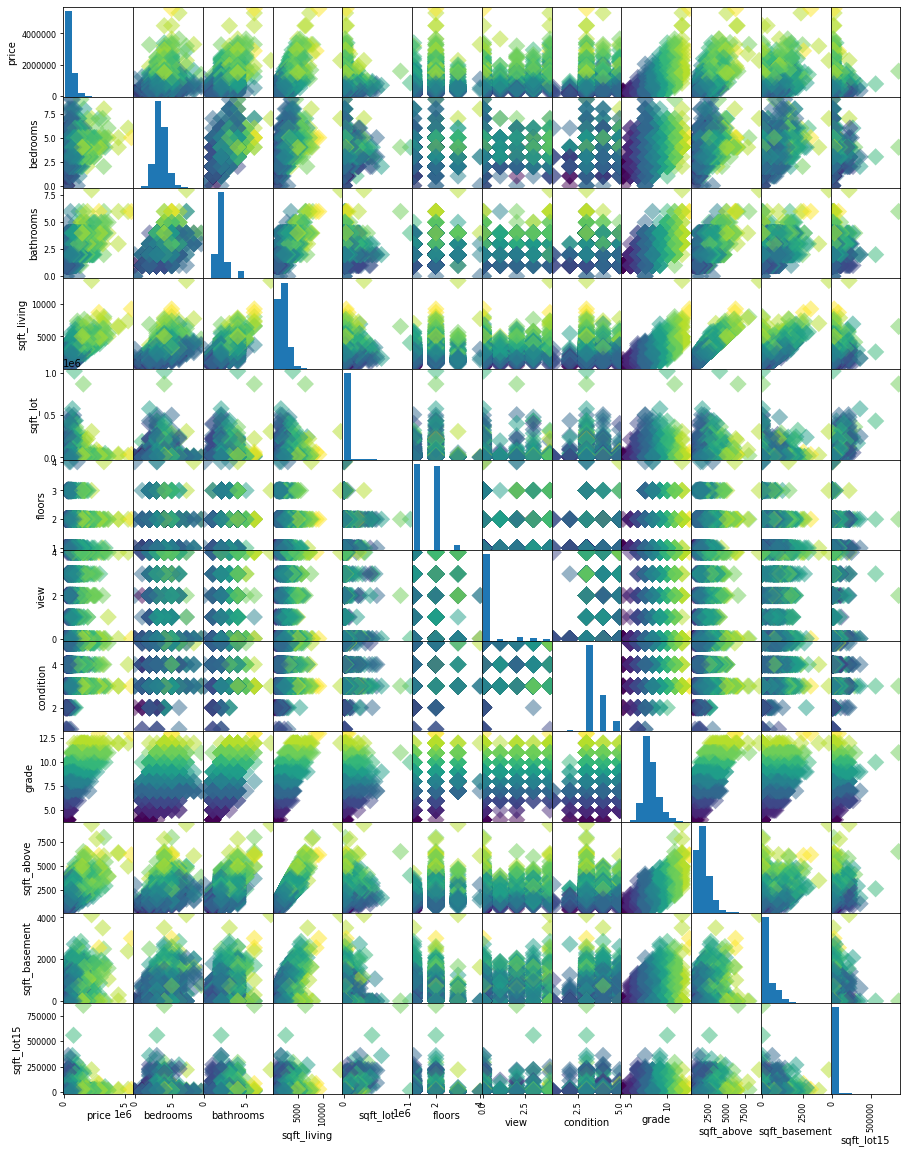

In [52]:
# plot scatter matrix to display Bivariate Relationships between combination variables
y = df_1['grade']
_ = pd.plotting.scatter_matrix(df_1, c = y, figsize=[15,20], s=150, marker='D')

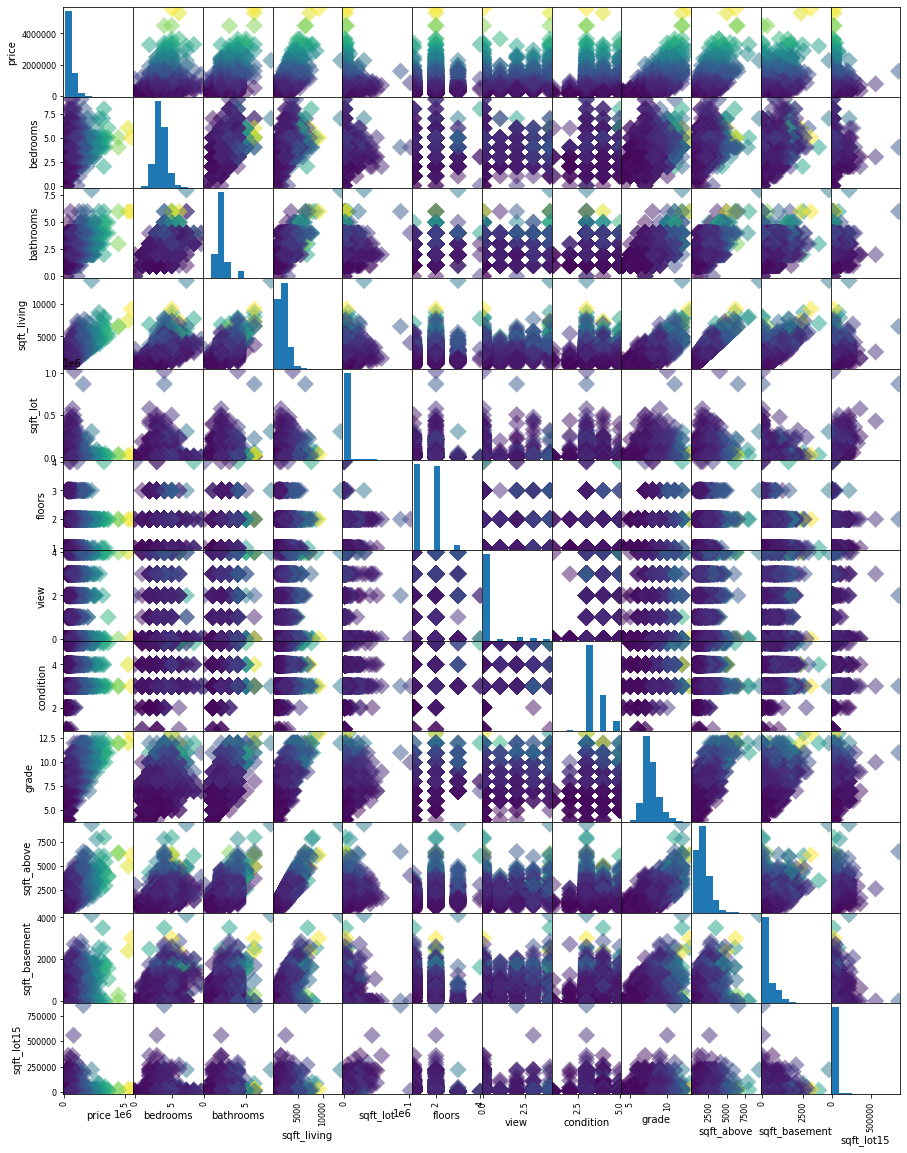

In [53]:
y = df_1['price']
_ = pd.plotting.scatter_matrix(df_1, c = y, figsize=[15,20], s=150, marker='D')

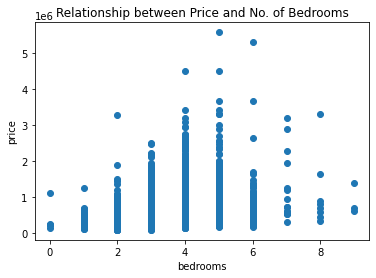

In [54]:
# Scatter plot for price vs number of bedrooms
x = df_1['bedrooms']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title('Relationship between Price and No. of Bedrooms');

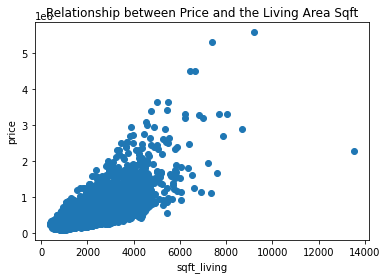

In [55]:
# Scatter plot of price and the living area square feet.
x = df_1['sqft_living']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title('Relationship between Price and the Living Area Sqft');

There's a positive relationship between the price and the living area sqft. As the sqft increases, the price also increases.

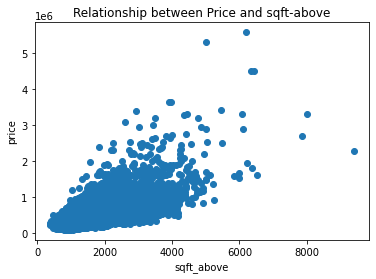

In [56]:
# Scatter plot of sqft-above and price
x = df_1['sqft_above']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel('sqft_above')
plt.ylabel("price")
plt.title("Relationship between Price and sqft-above");

There's a relationship between price and sqft above

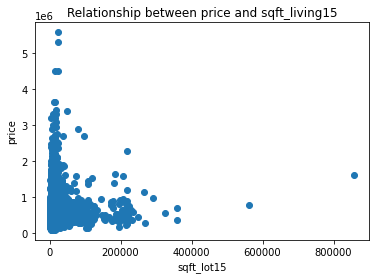

In [57]:
x = df_1['sqft_lot15']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel('sqft_lot15')
plt.ylabel("price")
plt.title("Relationship between price and sqft_living15");

In [58]:
# Convert the date index to time series
# For time series, set the date column to be the index column
# Save the changes in a new dataframe
time_series_df = data.copy(deep=True)
time_series_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
16074,1220000.0,4,2.00,3090,8125,2.5,0,0,5,8,3090,0,98117,47.6851,-122.395,1560,6250,1918,0.0
14274,960000.0,3,1.75,2460,4800,1.0,0,0,4,7,1230,1230,98112,47.6343,-122.282,2860,4800,1938,0.0


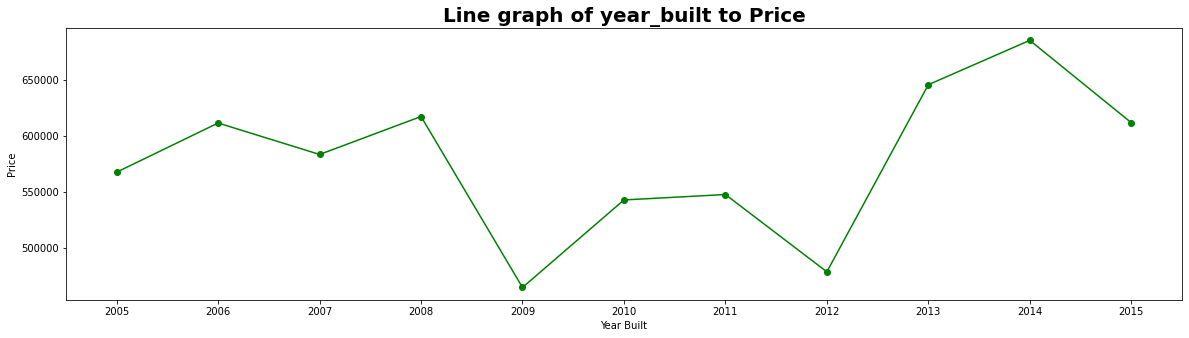

In [59]:
# Line graph of how the price has fluctuated over time from the year the houses were
# built for the past 10 years (2005 to 2015)
yr_built = time_series_df[time_series_df["year_built"] >= 2005]
scatter =yr_built.groupby("year_built")['price'].mean().reset_index(name = 'avg_per_year')

x = scatter['year_built']
y= scatter['avg_per_year']
plt.figure(figsize=(20,5))
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '-')
plt.xlabel('Year Built')
plt.xticks(x)
plt.ylabel('Price')
plt.title('Line graph of year_built to Price', fontsize = 20,fontweight='bold');

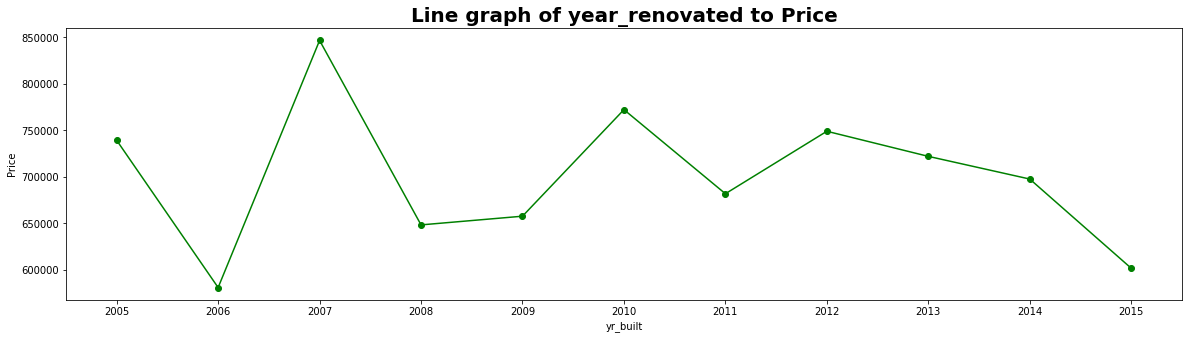

In [60]:
# Line graph of how the price has fluctuated over time from the year the houses were
# renovated for the past 10 years (2005 to 2015)
yr_renovated = data[data["year_renovated"] >= 2005]
scatter =yr_renovated.groupby("year_renovated")['price'].mean().reset_index(name = 'avg_year_renovated')

x = scatter['year_renovated']
y= scatter['avg_year_renovated']
plt.figure(figsize=(20,5))
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '-')
plt.xlabel('yr_built')
plt.xticks(x)
plt.ylabel('Price')
plt.title('Line graph of year_renovated to Price', fontsize = 20,fontweight='bold');

In [61]:
# make a copy of the dataset and create a new column for renovations
renov_df = data.copy(deep=True)

In [62]:
#Since the year renovated had most 0 values, we will change the the zeros to reflect
# not renovated and 1 to reflect those houses that were renovated.
renov_df.loc[df['year_renovated']==0,'renovations']=0
renov_df.loc[df['year_renovated']>0,'renovations']=1
renov_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations
16074,1220000.0,4,2.00,3090,8125,2.5,0,0,5,8,3090,0,98117,47.6851,-122.395,1560,6250,1918,0.0,0.0
14274,960000.0,3,1.75,2460,4800,1.0,0,0,4,7,1230,1230,98112,47.6343,-122.282,2860,4800,1938,0.0,0.0


In [63]:
# Convert float values of renovations to integer
renov_df['renovations'] = renov_df['renovations'].astype(int)
renov_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations
16074,1220000.0,4,2.0,3090,8125,2.5,0,0,5,8,3090,0,98117,47.6851,-122.395,1560,6250,1918,0.0,0


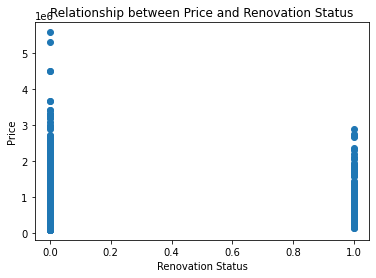

In [64]:
# Relationship between price and renovated houses or not
x = renov_df['renovations']
y = renov_df["price"]
plt.scatter(x, y)
plt.xlabel('Renovation Status')
plt.ylabel("Price")
plt.title("Relationship between Price and Renovation Status");

In [65]:
# Create a new column for current date (27th July 2021)
renov_df['date'] = pd.to_datetime('today')
renov_df.head(1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date
16074,1220000.0,4,2.0,3090,8125,2.5,0,0,5,8,3090,0,98117,47.6851,-122.395,1560,6250,1918,0.0,0,2021-07-28 14:52:30.441137


In [66]:
# Extract the year from current date
renov_df['current_year'] = renov_df['date'].dt.year
renov_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date,current_year
16074,1220000.0,4,2.00,3090,8125,2.5,0,0,5,8,3090,0,98117,47.6851,-122.395,1560,6250,1918,0.0,0,2021-07-28 14:52:30.441137,2021
14274,960000.0,3,1.75,2460,4800,1.0,0,0,4,7,1230,1230,98112,47.6343,-122.282,2860,4800,1938,0.0,0,2021-07-28 14:52:30.441137,2021


In [67]:
# Establish the age of the house by subtracting the year built from current year
renov_df['house_age'] = renov_df['current_year'] - renov_df['year_built']
renov_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date,current_year,house_age
16074,1220000.0,4,2.0,3090,8125,2.5,0,0,5,8,3090,0,98117,47.6851,-122.395,1560,6250,1918,0.0,0,2021-07-28 14:52:30.441137,2021,103


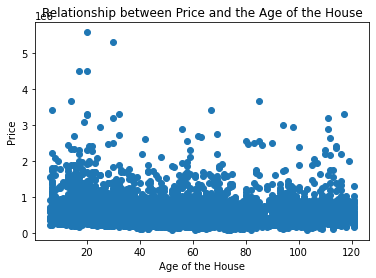

In [68]:
# relationship between price and age of the house
x = renov_df['house_age']
y = renov_df["price"]
plt.scatter(x, y)
plt.xlabel('Age of the House')
plt.ylabel("Price")
plt.title("Relationship between Price and the Age of the House");

#### 6.3 Performing Discriminant Analysis

In [69]:
# Preview the columns
renov_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations', 'date',
       'current_year', 'house_age'],
      dtype='object')

In [70]:
# Drop the date and current year column
renov_lda_df = renov_df.copy(deep=True)
renov_lda_df.head(1)
renov_lda_df.drop(columns=['date', 'current_year'], inplace=True)
renov_lda_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
16074,1220000.0,4,2.0,3090,8125,2.5,0,0,5,8,3090,0,98117,47.6851,-122.395,1560,6250,1918,0.0,0,103


In [71]:
# Preview the columns
renov_lda_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
       'house_age'],
      dtype='object')

In [72]:
# Create features and labels
X = renov_lda_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                  'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
                  'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
                  'house_age']].values
y = renov_lda_df['price'].values

In [73]:
# Divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

4885928.59393784
[-3.38373097e+04  3.33599942e+04  1.01466026e+02  1.43562736e-01
  2.20705501e+04  7.68927029e+05  4.53277993e+04  2.88027512e+04
  9.74543647e+04  6.27419679e+01  3.87240538e+01 -5.70555556e+02
  5.97997031e+05 -2.00669623e+05  3.12410913e+01 -3.81876190e-01
 -1.35276064e+03  3.69199564e+03 -7.36591818e+06  1.35276064e+03]


From the finding above, the values with regressor coefficient of negative shows that those independent variables have little or no impact on the price of the house. We will therefore drop them. These are: bedrooms, zipcode, longitude, sqft-lot15, year-built and renovations. We will therefore drop them and perform an accuracy of our prediction model.

The variables/factors that affect housing pricing from the linear discriminant analysis in descending order are :
1.   The Grade of the house
2.   The Year Renovated
3.   sqft above
4.   Water Front
5.   Sqft base





In [75]:
# Drop the independent variables that have no impact on the house prices
# These are bedrooms, zipcode, longitude, sqft-lot15, year-built and renovations
variables_df = renov_lda_df.copy(deep=True)
variables_df.head(1)
variables_df.drop(columns=['bedrooms', 'zipcode', 'long', 'sqft_lot15', 'year_built', 'renovations'], inplace=True)
variables_df.head(1)


,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,year_renovated,house_age
16074,1220000.0,2.0,3090,8125,2.5,0,0,5,8,3090,0,47.6851,1560,0.0,103


In [76]:
variables_df.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15', 'year_renovated', 'house_age'],
      dtype='object')

In [77]:
# Create features and labels
X = variables_df[['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                  'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
                  'sqft_living15', 'year_renovated', 'house_age']].values
y = variables_df['price'].values

In [78]:
# Divide data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-28187412.3719604
[ 2.48263787e+04  8.70162269e+01 -6.38222330e-02  2.26750721e+04
  7.69150124e+05  4.49585254e+04  2.93784774e+04  1.07845711e+05
  5.02919978e+01  3.67242291e+01  5.72422853e+05  2.87083673e+01
  1.99474815e+00  2.68753307e+03]


In [80]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

comparison_frame

,Actual,Predicted
0,725000.0,5.613111e+05
1,245000.0,2.021410e+05
2,425000.0,2.905134e+05
3,475000.0,5.710286e+05
4,630000.0,1.173434e+06
...,...,...
1478,280000.0,4.303964e+05
1479,605000.0,5.700275e+05
1480,135000.0,1.440878e+05
1481,320000.0,4.208312e+05


In [81]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,1.483000e+03,1.483000e+03
mean,5.509208e+05,5.434622e+05
std,3.825320e+05,3.125394e+05
min,8.500000e+04,-1.888241e+05
25%,3.200000e+05,3.463015e+05
50%,4.508000e+05,4.837562e+05
75%,6.650000e+05,6.833726e+05
max,4.500000e+06,2.696454e+06


In [82]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 123755.01816597252
Mean Squared Error: 42255163839.91375
Root Mean Squared Error: 205560.6086776203


In [83]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [85]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [86]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.012811867835468645


Despite the fact that the variables with no or limited effect on the house prices had been dropped, the the accuracy of the prediction model was 10.93%. This is a very low percentage for a predicting model. We will therefore perform feature engineering and see what model accuracy will be obtained.

### 6.4 Performing Feature Engineering

In [87]:
# Preview the dataframe
renov_lda_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
       'house_age'],
      dtype='object')

In [88]:
# we had already created a column for house age and renovations
# The renovations column was to have 1 represent houses that have been renovated 
# and 0 to represent houses that haven't been renovated
# We will create a new column for house space. This column will include sqft-living,
# sqft-basement and sqft-above
eng_df = renov_lda_df.copy(deep=True)
eng_df['house_space'] = eng_df['sqft_living'] + eng_df['sqft_basement'] + eng_df['sqft_above']

# Drop unnecessary columns
eng_df.drop(columns=['sqft_living', 'sqft_basement', 'sqft_above'], inplace=True)
eng_df.head(1)


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age,house_space
16074,1220000.0,4,2.0,8125,2.5,0,0,5,8,98117,47.6851,-122.395,1560,6250,1918,0.0,0,103,6180


## 7. Implementing the Solution-Multiple Linear Regression

### 7.1 Polynomial Regression

> We'll first check the multicollinearity between the variables and drop those variables that seem to be correlated.





#### 7.1.1 Multicollinearity

#### Finding correlation between the independent variables

In [89]:
# Make a copy of the dataframe
df_2 = eng_df.copy(deep=True)
df_2.head(2)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age,house_space
16074,1220000.0,4,2.00,8125,2.5,0,0,5,8,98117,47.6851,-122.395,1560,6250,1918,0.0,0,103,6180
14274,960000.0,3,1.75,4800,1.0,0,0,4,7,98112,47.6343,-122.282,2860,4800,1938,0.0,0,83,4920


In [90]:
df_2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
       'house_age', 'house_space'],
      dtype='object')

In [91]:
# Set price as the dependent variable
# Compute the correlation then use the correlation to compute the VIF score for each variable
# We'll drop the price column
prediction_df = df_2.drop(columns=['price'], inplace=True)
prediction_df = df_2.corr()
prediction_df 

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age,house_space
bedrooms,1.000000,0.528049,0.049824,0.183156,0.018308,0.091250,0.029987,0.365155,-0.154129,-0.015937,0.132740,0.400219,0.037657,0.151116,0.024043,0.023829,-0.151116,0.594654
bathrooms,0.528049,1.000000,0.098688,0.502190,0.090136,0.194133,-0.124203,0.650223,-0.179654,0.013868,0.214732,0.550932,0.093151,0.495028,0.043543,0.043125,-0.495028,0.741703
sqft_lot,0.049824,0.098688,1.000000,-0.001575,0.009815,0.074536,-0.021368,0.131007,-0.136971,-0.091464,0.244053,0.143780,0.758622,0.059320,0.014774,0.014833,-0.059320,0.199307
floors,0.183156,0.502190,-0.001575,1.000000,0.034036,0.035950,-0.260341,0.456903,-0.034814,0.049014,0.119511,0.268733,-0.009063,0.479776,0.011562,0.011476,-0.479776,0.353789
waterfront,0.018308,0.090136,0.009815,0.034036,1.000000,0.383833,0.018197,0.104715,0.024434,-0.004632,-0.022955,0.095109,0.025211,-0.023438,0.103168,0.103692,0.023438,0.128792
view,0.091250,0.194133,0.074536,0.035950,0.383833,1.000000,0.050827,0.259435,0.105696,0.009238,-0.086990,0.275739,0.066384,-0.055450,0.110559,0.110957,0.055450,0.290545
condition,0.029987,-0.124203,-0.021368,-0.260341,0.018197,0.050827,1.000000,-0.146861,-0.008742,-0.021377,-0.108713,-0.086744,-0.020982,-0.365937,-0.070679,-0.070101,0.365937,-0.051030
grade,0.365155,0.650223,0.131007,0.456903,0.104715,0.259435,-0.146861,1.000000,-0.170596,0.103748,0.203843,0.706495,0.120982,0.447389,0.003372,0.002999,-0.447389,0.750440
zipcode,-0.154129,-0.179654,-0.136971,-0.034814,0.024434,0.105696,-0.008742,-0.170596,1.000000,0.272435,-0.567580,-0.268715,-0.144743,-0.334142,0.079598,0.079636,0.334142,-0.184910
lat,-0.015937,0.013868,-0.091464,0.049014,-0.004632,0.009238,-0.021377,0.103748,0.272435,1.000000,-0.147231,0.041181,-0.092753,-0.155708,0.045836,0.045811,0.155708,0.048404


The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Using these correlations to compute the VIF score for each variable. But first we'll create a new dataframe with the inverse of the matrix above.

#### 7.1.2 Calculating the VIF Score for each independent variable

In [92]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df.values), index = prediction_df.index, columns=prediction_df.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age,house_space
bedrooms,8.108690e-01,3.971920e+00,2.850828e-01,8.383616e-02,5.133161e-01,4.960017e-01,3.567270e-01,-1.494333e+00,-1.077545e+00,3.266443e-01,-7.523338e-01,7.876100e-01,1.856801e-01,-3.152351e+14,1.123290e+03,-1.099074e+03,-3.155705e+14,-3.209896e+00
bathrooms,3.846392e+00,-1.819978e+01,-1.132241e+00,-5.918311e-01,-2.185406e+00,-1.916077e+00,-2.083849e+00,8.356957e+00,5.640024e+00,-1.320311e+00,3.799096e+00,-3.423149e+00,-3.676630e-01,1.512938e+15,-5.343954e+03,5.307779e+03,1.507979e+15,8.985250e+00
sqft_lot,2.501683e-01,-9.698406e-01,2.369741e+00,2.392780e-02,-3.576825e-02,-1.578152e-01,-5.443280e-02,2.599525e-01,2.652523e-01,4.522037e-03,-3.251420e-02,9.453145e-02,-1.786846e+00,7.231489e+13,-2.451955e+02,2.479892e+02,7.340755e+13,2.286344e-01
floors,1.150604e-02,-3.003485e-01,4.084863e-02,1.622109e+00,-6.494857e-04,1.094099e-01,1.646286e-01,-4.548031e-01,-2.297045e-01,-3.335141e-02,-3.728911e-02,1.855044e-01,5.912139e-02,-5.523256e+12,8.593792e+01,-5.601606e+01,-9.053243e+12,-5.626897e-02
waterfront,4.172234e-01,-1.738901e+00,-2.904906e-02,-2.663776e-02,1.012938e+00,-5.945692e-01,-1.587055e-01,6.992962e-01,4.864520e-01,-9.162455e-02,2.798556e-01,-2.135411e-01,-6.847804e-02,1.237984e+14,-4.220393e+02,4.242573e+02,1.245745e+14,7.542923e-01
view,4.413083e-01,-1.649636e+00,-1.552266e-01,8.238722e-02,-6.055271e-01,1.252638e+00,-1.918554e-01,4.556593e-01,2.449131e-01,1.077412e-02,4.030011e-01,-5.143058e-01,-1.242832e-02,1.104666e+14,-3.906897e+02,3.849001e+02,1.115837e+14,5.986657e-01
condition,3.151937e-01,-1.802720e+00,-5.329922e-02,1.335290e-01,-1.754275e-01,-1.949307e-01,1.102196e+00,6.368014e-01,6.105761e-01,-3.330333e-02,3.250100e-01,-1.686208e-01,-3.370007e-02,1.234366e+14,-3.998173e+02,4.247275e+02,1.285679e+14,7.890820e-01
grade,-1.488024e+00,8.519291e+00,3.347393e-01,-3.585622e-01,8.862077e-01,5.866436e-01,7.650355e-01,-1.753584e-01,-2.213861e+00,2.302904e-01,-1.186895e+00,4.204799e-01,2.831908e-01,-6.201606e+14,2.150478e+03,-2.158516e+03,-6.230359e+14,-5.660434e+00
zipcode,-1.045462e+00,5.489526e+00,2.965889e-01,-1.479438e-01,5.902687e-01,2.981422e-01,6.767850e-01,-2.128717e+00,2.139106e-01,2.672889e-02,-1.999316e-01,1.125773e+00,9.847088e-02,-3.966166e+14,1.391955e+03,-1.389534e+03,-3.931777e+14,-2.838161e+00
lat,3.405075e-01,-1.377257e+00,-1.085748e-02,-5.261540e-02,-1.243788e-01,-1.417743e-02,-6.161118e-02,2.419897e-01,5.228736e-02,1.087467e+00,1.746622e-01,-2.642209e-01,1.796542e-02,9.262751e+13,-3.327982e+02,3.323880e+02,9.587313e+13,6.702831e-01


The VIF score for each variable is below 5. A rule of thumb is if a VIF is > 10, there's high multicollinearity among the variables. In this case, with values around 1, we are in good shape, and can proceed with the regression. The VIF for house age is -5.629500e+14, that of renovations is 17206.700606 and that of year renovated is 17206.344344. This indicates that all the three variables are correlated. having the renovations and year renovated being positively correlated while the two have a negative correlation with the house age. Meaning that as the house ages, more renovations are done. Therefore, we will drop the year renovated variable and see what impact it has on the house age and renovations variables.

In [93]:
# Check the columns
df_2.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
       'house_age', 'house_space'],
      dtype='object')

In [94]:
# Compute Correlation after dropping the year renovated variable
prediction_df2 = df_2.drop(columns=['year_renovated'], inplace=True)
prediction_df2 = df_2.corr()
prediction_df2 

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations,house_age,house_space
bedrooms,1.000000,0.528049,0.049824,0.183156,0.018308,0.091250,0.029987,0.365155,-0.154129,-0.015937,0.132740,0.400219,0.037657,0.151116,0.023829,-0.151116,0.594654
bathrooms,0.528049,1.000000,0.098688,0.502190,0.090136,0.194133,-0.124203,0.650223,-0.179654,0.013868,0.214732,0.550932,0.093151,0.495028,0.043125,-0.495028,0.741703
sqft_lot,0.049824,0.098688,1.000000,-0.001575,0.009815,0.074536,-0.021368,0.131007,-0.136971,-0.091464,0.244053,0.143780,0.758622,0.059320,0.014833,-0.059320,0.199307
floors,0.183156,0.502190,-0.001575,1.000000,0.034036,0.035950,-0.260341,0.456903,-0.034814,0.049014,0.119511,0.268733,-0.009063,0.479776,0.011476,-0.479776,0.353789
waterfront,0.018308,0.090136,0.009815,0.034036,1.000000,0.383833,0.018197,0.104715,0.024434,-0.004632,-0.022955,0.095109,0.025211,-0.023438,0.103692,0.023438,0.128792
view,0.091250,0.194133,0.074536,0.035950,0.383833,1.000000,0.050827,0.259435,0.105696,0.009238,-0.086990,0.275739,0.066384,-0.055450,0.110957,0.055450,0.290545
condition,0.029987,-0.124203,-0.021368,-0.260341,0.018197,0.050827,1.000000,-0.146861,-0.008742,-0.021377,-0.108713,-0.086744,-0.020982,-0.365937,-0.070101,0.365937,-0.051030
grade,0.365155,0.650223,0.131007,0.456903,0.104715,0.259435,-0.146861,1.000000,-0.170596,0.103748,0.203843,0.706495,0.120982,0.447389,0.002999,-0.447389,0.750440
zipcode,-0.154129,-0.179654,-0.136971,-0.034814,0.024434,0.105696,-0.008742,-0.170596,1.000000,0.272435,-0.567580,-0.268715,-0.144743,-0.334142,0.079636,0.334142,-0.184910
lat,-0.015937,0.013868,-0.091464,0.049014,-0.004632,0.009238,-0.021377,0.103748,0.272435,1.000000,-0.147231,0.041181,-0.092753,-0.155708,0.045811,0.155708,0.048404


In [95]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df2.values), index = prediction_df2.index, columns=prediction_df2.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations,house_age,house_space
bedrooms,6.359035e-01,5.227137e+00,1.228648e-01,-4.258310e-01,1.497259e-02,7.276142e-02,-3.430077e-01,-1.079509e+00,-1.197101e+00,2.692068e-01,-8.931784e-01,5.128583e-01,2.495498e-01,-3.645956e+14,-3.427944e-01,-3.668639e+14,-3.387223e+00
bathrooms,5.267590e+00,-2.725354e+01,-3.919791e-01,2.072504e+00,2.404105e-01,1.315526e-01,1.425076e+00,7.119024e+00,6.829324e+00,-1.145927e+00,4.883873e+00,-2.335647e+00,-7.476058e-01,1.920351e+15,1.706977e+00,1.924973e+15,1.086364e+01
sqft_lot,1.197376e-01,-3.533203e-01,2.418085e+00,5.965062e-02,6.849543e-02,-6.974853e-02,5.832402e-02,-3.666933e-02,8.409789e-02,4.833200e-02,-1.459596e-01,2.242944e-01,-1.778131e+00,2.463415e+13,2.878925e-02,2.452893e+13,-1.046571e-01
floors,-3.932252e-01,1.831861e+00,6.039968e-02,1.422140e+00,-4.200573e-02,6.943062e-02,7.278363e-03,-9.745838e-01,-6.994828e-01,3.728560e-02,-3.618649e-01,3.409960e-01,1.171055e-01,-1.492111e+14,-2.376735e-01,-1.519253e+14,-9.112525e-01
waterfront,1.415001e-03,3.121089e-01,6.940336e-02,-4.973608e-02,1.182612e+00,-4.510156e-01,-2.221019e-02,-6.463102e-02,-4.329750e-02,2.026081e-02,-6.962173e-02,9.826069e-02,-2.767018e-02,-2.026765e+13,-9.136878e-02,-1.994443e+13,-2.334145e-01
view,1.245811e-01,-8.266880e-02,-7.290526e-02,8.600251e-02,-4.485051e-01,1.383223e+00,-4.987838e-02,-1.436684e-01,-1.726918e-01,1.004568e-01,1.295994e-01,-2.628571e-01,1.757832e-02,-1.333220e+12,-5.356484e-02,-6.711417e+11,-1.701566e-01
condition,-3.260755e-01,1.332153e+00,5.618920e-02,1.497576e-02,-1.819644e-02,-6.111962e-02,1.185022e+00,-3.630737e-01,-1.475623e-01,1.145580e-01,-2.076977e-01,2.124978e-01,3.469986e-02,-8.893359e+13,1.337755e-01,-8.992950e+13,-6.526735e-01
grade,-1.236294e+00,7.771044e+00,-2.166874e-02,-1.067577e+00,-5.620981e-02,-2.086842e-01,-4.417491e-01,1.318455e+00,-1.714710e+00,9.698693e-03,-9.271026e-01,-3.493063e-01,3.249863e-01,-5.025215e+14,-5.712026e-01,-5.035573e+14,-4.622123e+00
zipcode,-1.217468e+00,6.914152e+00,9.184585e-02,-7.587144e-01,-2.817203e-02,-2.216167e-01,-1.814698e-01,-1.589891e+00,1.288249e-01,-5.401777e-02,-3.364207e-01,7.693027e-01,1.712207e-01,-4.322082e+14,-4.022856e-01,-4.351792e+14,-2.883582e+00
lat,3.056102e-01,-1.307906e+00,4.422737e-02,5.956539e-02,2.082863e-02,1.094263e-01,1.289959e-01,3.693478e-02,-1.461602e-02,1.117926e+00,1.391831e-01,-1.519783e-01,1.052129e-02,8.175690e+13,1.102954e-01,8.043203e+13,5.337392e-01


After dropping the year renovated variable, the VIF score for renovations has improved drastically from 17206.70 to 1.16. A VIF score of 1.16 is good for further analysis as it indicates that the renovations variable has no correlation with any other independent variables. However, the VIF score for year built and house age are the same with a negative value of -5.629500e+14.

If the independent variables in a regression model show a perfectly predictable linear relationship, it is a perfect multicollinearity.

With multicollinearity, the regression coefficients are still consistent but are no longer reliable since the standard errors are inflated. It means that the model’s predictive power is not reduced, but the coefficients may not be statistically significant with a Type II error. It is in this view that I will drop the house age variable and check the VIF of the remaining variables again.

In [96]:
# The house age seem to have a correlation with year built variable beacause
# they have the same VIF score so I will drop the year built variable
# Compute Correlation after dropping the correlated independent variables
prediction_df3 = df_2.drop(columns=['year_built'], inplace=True)
prediction_df3 = df_2.corr()
prediction_df3 

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,renovations,house_age,house_space
bedrooms,1.000000,0.528049,0.049824,0.183156,0.018308,0.091250,0.029987,0.365155,-0.154129,-0.015937,0.132740,0.400219,0.037657,0.023829,-0.151116,0.594654
bathrooms,0.528049,1.000000,0.098688,0.502190,0.090136,0.194133,-0.124203,0.650223,-0.179654,0.013868,0.214732,0.550932,0.093151,0.043125,-0.495028,0.741703
sqft_lot,0.049824,0.098688,1.000000,-0.001575,0.009815,0.074536,-0.021368,0.131007,-0.136971,-0.091464,0.244053,0.143780,0.758622,0.014833,-0.059320,0.199307
floors,0.183156,0.502190,-0.001575,1.000000,0.034036,0.035950,-0.260341,0.456903,-0.034814,0.049014,0.119511,0.268733,-0.009063,0.011476,-0.479776,0.353789
waterfront,0.018308,0.090136,0.009815,0.034036,1.000000,0.383833,0.018197,0.104715,0.024434,-0.004632,-0.022955,0.095109,0.025211,0.103692,0.023438,0.128792
view,0.091250,0.194133,0.074536,0.035950,0.383833,1.000000,0.050827,0.259435,0.105696,0.009238,-0.086990,0.275739,0.066384,0.110957,0.055450,0.290545
condition,0.029987,-0.124203,-0.021368,-0.260341,0.018197,0.050827,1.000000,-0.146861,-0.008742,-0.021377,-0.108713,-0.086744,-0.020982,-0.070101,0.365937,-0.051030
grade,0.365155,0.650223,0.131007,0.456903,0.104715,0.259435,-0.146861,1.000000,-0.170596,0.103748,0.203843,0.706495,0.120982,0.002999,-0.447389,0.750440
zipcode,-0.154129,-0.179654,-0.136971,-0.034814,0.024434,0.105696,-0.008742,-0.170596,1.000000,0.272435,-0.567580,-0.268715,-0.144743,0.079636,0.334142,-0.184910
lat,-0.015937,0.013868,-0.091464,0.049014,-0.004632,0.009238,-0.021377,0.103748,0.272435,1.000000,-0.147231,0.041181,-0.092753,0.045811,0.155708,0.048404


In [97]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df3.values), index = prediction_df3.index, columns=prediction_df3.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,renovations,house_age,house_space
bedrooms,1.714064,-0.490699,0.043159,0.064894,0.062184,0.115344,-0.046433,0.291654,0.095153,0.059129,0.019315,0.037989,0.101101,0.027002,-0.146149,-1.033294
bathrooms,-0.490699,3.126400,0.028036,-0.498340,-0.006889,-0.092036,-0.148735,-0.181190,0.003482,-0.047674,0.114135,0.138767,0.037975,-0.245567,0.898344,-1.550322
sqft_lot,0.043159,0.028036,2.423817,0.027026,0.065146,-0.072549,0.036782,-0.132749,-0.003294,0.062586,-0.206387,0.257245,-1.768197,0.002735,-0.114593,-0.263588
floors,0.064894,-0.498340,0.027026,1.618872,-0.022301,0.086638,0.136793,-0.390836,-0.170657,-0.047749,0.007875,0.141922,0.055946,-0.086822,0.456593,0.026181
waterfront,0.062184,-0.006889,0.065146,-0.022301,1.185103,-0.448727,-0.007060,0.008800,0.027434,0.010131,-0.018877,0.074358,-0.035565,-0.071629,-0.010516,-0.105719
view,0.115344,-0.092036,-0.072549,0.086638,-0.448727,1.383229,-0.050738,-0.150254,-0.171001,0.100336,0.130561,-0.261401,0.017197,-0.053583,-0.128132,-0.162817
condition,-0.046433,-0.148735,0.036782,0.136793,-0.007060,-0.050738,1.256804,-0.023070,0.174239,0.061300,0.018953,0.100440,-0.002235,0.223952,-0.578864,-0.057224
grade,0.291654,-0.181190,-0.132749,-0.390836,0.008800,-0.150254,-0.023070,3.254880,0.077766,-0.278600,0.310243,-1.001486,0.119635,-0.056783,0.660663,-1.392761
zipcode,0.095153,0.003482,-0.003294,-0.170657,0.027434,-0.171001,0.174239,0.077766,1.671744,-0.303820,0.749900,0.205637,-0.007485,0.038495,-0.262640,-0.089858
lat,0.059129,-0.047674,0.062586,-0.047749,0.010131,0.100336,0.061300,-0.278600,-0.303820,1.163989,-0.056611,-0.047811,0.042556,0.028379,-0.301659,0.021414


After dropping the correlated variables, the VIF score of each independent variable is now at one. This shows that there's no multicorrelinearity between independent variables. We can now proceed with regression; model creation and displaying a residual plot for it.

#### 7.1.3 Building model

In [98]:
prediction_df3.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovations', 'house_age', 'house_space'],
      dtype='object')

In [99]:
## Preview the columns
df_2.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovations', 'house_age', 'house_space'],
      dtype='object')

In [100]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [118]:
# Import the polynomial features and the linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X = df_2.values
y = renov_lda_df['price'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Fit polynomial Regression to the dataset with a degree of 2
polynomial_regression = PolynomialFeatures(degree = 2) 
X_polynomial = polynomial_regression.fit_transform(X)

pol_regression = LinearRegression()
pol_regression.fit(X_polynomial, y)

y_pred = pol_regression.predict(polynomial_regression.fit_transform(X_test))

In [102]:
# Fit polynomial Regression to the dataset with a degree of 3
polynomial_regression_3 = PolynomialFeatures(degree = 3) 
X_polynomial_3 = polynomial_regression_3.fit_transform(X)

pol_regression_3 = LinearRegression()
pol_regression_3.fit(X_polynomial_3, y)

y_pred_3 = pol_regression_3.predict(polynomial_regression_3.fit_transform(X_test))

In [103]:
# Fit polynomial Regression to the dataset with a degree of 4
polynomial_regression_4 = PolynomialFeatures(degree = 4) 
X_polynomial_4 = polynomial_regression_4.fit_transform(X)

pol_regression_4 = LinearRegression()
pol_regression_4.fit(X_polynomial_4, y)

y_pred_4 = pol_regression_4.predict(polynomial_regression_4.fit_transform(X_test))

In [104]:
# Fit polynomial Regression to the dataset with a degree of 5
#polynomial_regression_5 = PolynomialFeatures(degree = 5) 
#X_polynomial_5 = polynomial_regression_5.fit_transform(X)

#pol_regression_5 = LinearRegression()
#pol_regression_5.fit(X_polynomial_5, y)

#y_pred_5 = pol_regression_5.predict(polynomial_regression_5.fit_transform(X_test))

In [119]:
# Calculating the Root Mean Squared Error
print(f"The Root Mean Squared Error for the 2nd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"The Root Mean Squared Error for the 3rd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_3))}")
print(f"The Root Mean Squared Error for the 4th  degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_4))}")
#print(f"The Root Mean Squared Error for the 5th degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_5))}")

The Root Mean Squared Error for the 2nd degree of freedom is: 147466.45967206568
The Root Mean Squared Error for the 3rd degree of freedom is: 124002.40556595183
The Root Mean Squared Error for the 4th  degree of freedom is: 115427.29153453793


The model with the fourth degree of freedom seem to be the preffered amongs't the three models because it has the lowest mean of 115,427.29 although this value is so high for a root mean squared error.

#### 7.1.4 Cross Validating the model

In [106]:
# import the Kfold
from sklearn.model_selection import KFold

# We will use the K-Fold cross validation with a value of k=10
folds = KFold(n_splits=10)
print(f"The number of folds used is: {folds.get_n_splits(X)}")

# Assign RMSE to an empty list 
# then we will append the computed RMSES values of the 10 folds to the empty RMSES list
# and thereafter compute the avarage RMSES
RMSES = [] 

# Training Model 1
count = 1
for train_index, test_index in folds.split(X):
  print(f"\nTraining model {count}")
  
  # Set up the train and test 
  # With 10 folds, results in a model skill estimate with a low bias modest variance.
  X1_train, X1_test = X[train_index], X[test_index]
  y1_train, y1_test = y[train_index], y[test_index]
  
  # Fitting the model 
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
  # Assess the accuraccy of the model
  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  print(f"Model {count} Root Mean Squared Error is: {rmse_value}")
  count = count + 1

The number of folds used is: 10

Training model 1
Model 1 Root Mean Squared Error is: 154502.43157386637

Training model 2
Model 2 Root Mean Squared Error is: 176560.53834351225

Training model 3
Model 3 Root Mean Squared Error is: 201158.2650611943

Training model 4
Model 4 Root Mean Squared Error is: 212355.34972688073

Training model 5
Model 5 Root Mean Squared Error is: 199918.8393154595

Training model 6
Model 6 Root Mean Squared Error is: 174296.96315762788

Training model 7
Model 7 Root Mean Squared Error is: 217839.58707221338

Training model 8
Model 8 Root Mean Squared Error is: 183807.73538983337

Training model 9
Model 9 Root Mean Squared Error is: 220998.76914049624

Training model 10
Model 10 Root Mean Squared Error is: 169513.1901963391


From the 10 folds, the model with the least root mean squared error is the first training model with a value of 154502.43 which seems the preferred model.

In [120]:
# Model evaluation

base_model = metrics.mean_squared_error(y_test, y_pred)
 
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))  
print('\nRoot Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nThe R2 score is          : ', r2_score(y_test, y_pred))

Mean Squared Error       :  21746356728.21297

Root Mean Squared Error  :  147466.45967206568

The R2 score is          :  0.8437602727788504


After performing model evaluation, it is evident that the model with the Root Mean Squared Error is the best for it has a prediction percentage of 84.38%. It's RMSe value is also below the average of the RMSES of the 10 folds.

In [108]:
# RMSES Average
print(f"The Average Value of the RMSES of the 10 folds is: {np.mean(RMSES)}")

The Average Value of the RMSES of the 10 folds is: 191095.16689774228


#### 7.1.5 Residual plots and heteroskedasticity testing

In [109]:
# Residuals
residuals = np.subtract(y_pred_4, y_test)
pd.DataFrame(residuals).describe()

,0
count,2.225000e+03
mean,6.041427e+02
std,1.154517e+05
min,-1.045194e+06
25%,-5.619732e+04
50%,3.086642e+03
75%,6.431972e+04
max,4.992728e+05


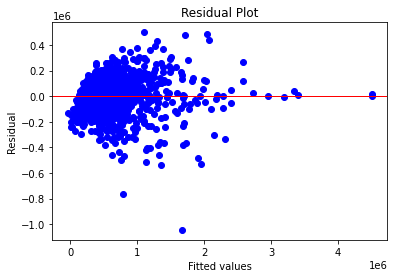

In [110]:
# Residual plot for the Model 
plt.scatter(y_pred_4, residuals, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Most of the residuals value are concentrated near the line of best fit. Which is good for the model.

In [111]:
# Residual mean
residuals.mean()

604.1427201538943

##### Computing the Critical Value 

In [112]:
# Use bartlett's test. 
# The test establishes as a null hypothesis that the variance is equal for all datapoints
# and the Ha hypothesis that the variance is different for at least one pair of datapoints
import scipy.stats as stats
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_4, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_4)-1
print(f"The degree of freedom is: {degree_of_freedom}")

# Probability
probability = 1 - p_value
print(f"The probability value is: {probability}")

# Critical Value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(f"The critical value is: {critical_value}")

if (test_result > critical_value):
  print("The variances are unequal! Reasses the Model!")
else:
  print("The variances are homogeneous! The model is good for consideration")

Test result: 2409.478458961191
P-value: 0.0
The degree of freedom is: 2224
The probability value is: 1.0
The critical value is: inf
The variances are homogeneous! The model is good for consideration


Having homogeneous variances is a sufficient confirmation that we can be comfortable with the results for predicting variables for sales prices. 

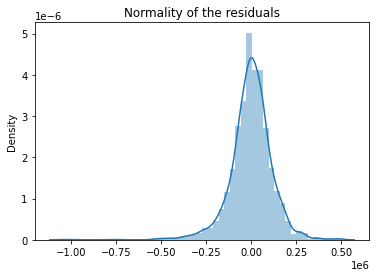

In [113]:
#Distribution of error terms
residuals_plot = sns.distplot(residuals,kde=True)
residuals_plot = plt.title('Normality of the residuals');

### 7.2 Logistic regression model

In [114]:
df_2.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovations', 'house_age', 'house_space'],
      dtype='object')

In [121]:
# Previewing the dataset
logistic_df = df_2.copy(deep=True)
logistic_df.head(2)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,renovations,house_age,house_space
16074,4,2.00,8125,2.5,0,0,5,8,98117,47.6851,-122.395,1560,6250,0,103,6180
14274,3,1.75,4800,1.0,0,0,4,7,98112,47.6343,-122.282,2860,4800,0,83,4920


In [122]:
# create feature and labels for the data
X=logistic_df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
               'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
               'sqft_lot15', 'renovations', 'house_age', 'house_space']]
y=df['price']

In [123]:
# Fit the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [124]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Fit the model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [125]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## 8. Challenging the solution

### 8.1 Quantile Regression

When to use quantile Regression:
1. To estimate the median, or the 0.25 quantile, or any quantile 
2. Key assumption of linear regression is not satisfied
3. When they are Outliers in the data
4. residuals are not normal 
5. Increase in error variance with increase in outcome variable

In [126]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [127]:
# Declaring our X and y variables
# from all other regression models, we can see that grade has a high detrminant capacity
df_copy = df_1.copy(deep=True)

X = df_copy.drop(['price'], axis=1)
y = df_copy.price

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)


# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ view + condition + grade + sqft_above + sqft_basement + year_built + year_renovated + sqft_living15 + sqft_lot15', data)
res = mod.fit(q=.5)

# Print the summary of the model
#
print(res.summary())
# The intercept is 9.09e+05 
# These are the parameters for the 0.5th quantile for y.

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3805
Model:                       QuantReg   Bandwidth:                   3.560e+04
Method:                 Least Squares   Sparsity:                    3.401e+05
Date:                Wed, 28 Jul 2021   No. Observations:                 7415
Time:                        15:20:01   Df Residuals:                     7405
                                        Df Model:                            9
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.075e+06   1.69e+05     24.147      0.000    3.74e+06    4.41e+06
view            5.183e+04   2812.931     18.427      0.000    4.63e+04    5.73e+04
condition       1.713e+04   3361.398      5.095      0.000    1.05e+04    2.37e+04
grade           1.225e+05   2986

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [128]:
# plotting Models for other Quantiles
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['grade'], res.params['condition'], res.params['view']] 
               + [res.conf_int().loc['grade'].tolist(), res.conf_int().loc['condition'].tolist(), res.conf_int().loc['view'].tolist()])

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'grade_coef', 'condition_coef', 'view_coef', 'condition_bound', 'grade_bound', 'view_bound'])
params

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

,qt,intercept,grade_coef,condition_coef,view_coef,condition_bound,grade_bound,view_bound
0,0.1,1.832104e+06,63849.614439,13710.365785,28070.978334,"[58856.28292410669, 68842.94595405611]","[7026.208061306421, 20394.523509535906]","[22623.947102703794, 33518.009565889486]"
1,0.2,2.258096e+06,91336.313338,17478.303008,26791.287088,"[85909.64304855758, 96762.98362830548]","[10636.664886430186, 24319.94112919895]","[21134.218717890195, 32448.35545854656]"
2,0.3,2.622574e+06,108117.712245,22376.174174,33343.662587,"[102403.76564409278, 113831.65884619209]","[15491.586590213308, 29260.761757389104]","[27674.414846072814, 39012.910327285266]"
3,0.4,2.867422e+06,112331.689386,26074.507781,43576.273265,"[106292.75058304222, 118370.62818899489]","[19117.457784138398, 33031.55777703341]","[37709.34614619733, 49443.200384393764]"
4,0.5,4.074884e+06,122522.871363,17127.296886,51834.326566,"[116668.22896889914, 128377.51375782918]","[10538.00000400704, 23716.593768255294]","[46320.18215459313, 57348.47097644482]"
5,0.6,4.318207e+06,129025.416636,17975.243685,61549.437556,"[123003.91679248432, 135046.91647908153]","[11297.297193793427, 24653.19017620167]","[55986.023271739854, 67112.8518407667]"
6,0.7,4.210306e+06,128502.504446,21976.098060,70548.594594,"[121842.96601958488, 135162.0428731855]","[14705.204309646317, 29246.991810259016]","[64500.30664330328, 76596.88254508909]"
7,0.8,1.297485e+06,108810.778514,56612.914591,78859.573244,"[100082.20615313777, 117539.35087395816]","[47242.79342421097, 65983.03575765202]","[70955.78300408018, 86763.36348376307]"
8,0.9,3.000908e+06,120042.390885,20764.740745,134442.313488,"[108940.9712457556, 131143.8105243601]","[9204.838311270738, 32324.643178993792]","[125173.1003840859, 143711.52659258153]"


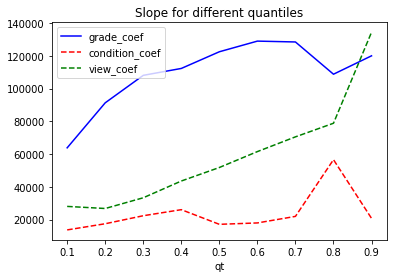

In [129]:
# Plot the changes in the quantile coeffiecients
params.plot(x = 'qt', y = ['grade_coef', 'condition_coef', 'view_coef', 'condition_bound', 'grade_bound'],
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()


### 8.2 Ridge Regression

In [130]:
#Defining the dependent and indepedent variables
X = df_copy.iloc[:,2:-1]
y = df_copy.iloc[:, 1]

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)

# Import Ridge and GridSerachcv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Grid Search
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-2,100,100)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

#Fit the model to the data
search.fit(X_train,y_train,)

#The best alpha forour model given the range we set in the grid search
search.best_params_

#The best Mean squared error we can expect to get from the ridge model
ridge_mse = abs(search.best_score_)
print(ridge_mse)

#Compare the results of the ridge regression to the linear regression
if base_model > ridge_mse:
  print('\nThe ridge model produced a lower mean squared error.')
  print('Therefore this model is better compaired to the linear model.')
else:
  print('\nThe ridge model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the ridge model.')

0.503813999188807

The ridge model produced a lower mean squared error.
Therefore this model is better compaired to the linear model.


In [131]:
#The Test Model
# Fit the model with the best parameters from the grid search
# Calculate the mean squared error.

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
test_model = (mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))
print(test_model)

#Compare the results of the ridge regression to the linear regression
if base_model > ridge_mse:
  print('\nThe ridge model produced a lower mean squared error.')
  print('Therefore this model is better compaired to the linear model.')
else:
  print('\nThe ridge model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the ridge model.')

#checking the model accuracy using R2 score
k = (r2_score(y_test, y_pred))*100
print('\nThe R2 score for the ridge model :', r2_score(y_test, y_pred))
print('The model is ', k ,'% accurate')

0.48352508272795225

The ridge model produced a lower mean squared error.
Therefore this model is better compaired to the linear model.

The R2 score for the ridge model : 0.397254746600497
The model is  39.7254746600497 % accurate


In [132]:
# Determine the coefficients of these models by using for loop to go through 
# the model and the zip function to combine the two columns.
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat]= coef

coef_dict_baseline

{'bathrooms': -32991.65119853942,
 'condition': 44944.92878816567,
 'floors': 28592.636965989775,
 'grade': 27435.125887531303,
 'sqft_above': 103043.76166396037,
 'sqft_basement': -585.9211391268566,
 'sqft_living': 25956.257826222292,
 'sqft_lot': 0.1562839753642038,
 'view': 755716.4555025547}

In [133]:
#Checking the Ridge coefficients
print('Ridge coefficients')
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat]= coef
coef_dict_baseline

Ridge coefficients


{'bathrooms': 0.4486721458335954,
 'condition': -0.007006967438781365,
 'floors': -0.005656245560557845,
 'grade': 0.006105397287395159,
 'sqft_above': 0.00220812132181214,
 'sqft_living': -0.009184575512496653,
 'sqft_lot': 0.006762297613095504,
 'view': -0.005362311737788567}

#### 8.3 Lasso Regression

The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [134]:
# Check the column names
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [135]:
#Choosing our mtrix of features x and the dv
x = data[['bedrooms', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'year_renovated', 'zipcode', 'lat', 'long','sqft_living','sqft_lot', "floors"]]
y = data["price"]

In [136]:
#splitting the data into the training test and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [137]:
#Standadising my datasetset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [138]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
y_pred = gridlasso.predict(x_test)

In [140]:
# getting rmse and r2 score
r2 = r2_score(y_test,y_pred)
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the lasso model is:",r2)

The RMSE for the lasso model: 216623.03168359006
The R2 score for the lasso model is: 0.6791023123152032


In [141]:
#checking the model accuracy using R2 score
accuracy1 = (r2_score(y_test, y_pred))*100
print(f"The model is {accuracy1} % accurate")

The model is 67.91023123152033 % accurate


#### 8.4 Elastic Net Regression

In [142]:
#Choosing our mtrix of features x and the dv
x = data[['bedrooms', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'year_renovated', 'zipcode', 'lat', 'long','sqft_living','sqft_lot', "floors"]]
y = data["price"]

In [143]:
#splitting the data into the training test and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [144]:
# Normalizing the data and creating our grid.
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [145]:
#fitting the model into the elastic regression
search.fit(x_train, y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [146]:
#fitting the model 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(x_train,y_train)

# Making the predictions
y_pred = elastic.predict(x_test)
r2 = r2_score(y_test, y_pred)

#getting the rmse and the r2
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the Elastic model is:",r2)

The RMSE for the Elastic model: 216835.01836927165
The R2 score for the Elastic model is: 0.6784739458689396


In [147]:
#checking the model accuracy using R2 score
accuracy = (r2_score(y_test, y_pred))*100
print(f"The model is {accuracy} % accurate")

The model is 67.84739458689396 % accurate


### 9.0 Conclusion


R-squared shows how well the regression model fits the observed data. The Elastic Model had an r-squared of 0.6784739458689396 which is 67.84% accurate,  Lasso Regression had an r-squared of 0.6791023123152032 that is 67.91% accurate , Ridge with an r2 of 0.397254746600497 with an accuracy of 39.72 and quantile regression with an r2 of 0.3805 which is 38.05% accurate. Amongst the four regression models, elastic model revealed a better fit for the model having the highest R2 score of 0.6784739458689396 thus being 67.84%.

#### 9.1 Did we have the right data:
Somehow yes we did have the right data. The only challenge was that the data would have captured the original price and the current valuation price for proper price predictions.

#### 9.2 Challenging the Solution
We may need to use other types of models such us Random Forest etc in-oder to increase the accuracy of the data.